In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [59]:
# dataset exploring
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [60]:
#dataset exploring
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [61]:
# Data set exploring
df.shape

(440, 8)

In [62]:
#check for missing values if there is any
df.isnull().sum()

# As the output shoes that there is not any missing values and thus there is no need to drop any column form 
# the data set

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [63]:
# Standardize the data using sklearn StandardScaler

from sklearn.preprocessing import StandardScaler


model = StandardScaler()
model.fit_transform(df)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [64]:
print(model.fit(df))

StandardScaler()


In [83]:
# fitnning of the data on the kmean model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [84]:
#display of cluster centers

cc=kmeans.cluster_centers_
print(cc)

[[1.13793103e+00 2.58620690e+00 3.61444828e+04 5.47146552e+03
  6.12879310e+03 6.29865517e+03 1.06400000e+03 2.31672414e+03]
 [1.86315789e+00 2.53684211e+00 4.80884211e+03 1.05250105e+04
  1.69097895e+04 1.46258947e+03 7.30240000e+03 1.65088421e+03]
 [1.90909091e+00 2.54545455e+00 1.98882727e+04 3.61423636e+04
  4.55174545e+04 6.32890909e+03 2.14170909e+04 8.41400000e+03]
 [1.15217391e+00 2.53623188e+00 9.08746377e+03 3.02742754e+03
  3.75351449e+03 2.81798551e+03 1.00300362e+03 1.04052536e+03]]


In [85]:
#display of k menas inertia
intr=kmeans.inertia_
print(intr)

64855545845.90139


In [86]:
labels = kmeans.labels_

print(labels)

[3 1 3 3 0 3 3 3 3 1 1 3 0 1 0 3 1 3 3 3 3 3 0 2 0 3 3 3 1 0 3 3 3 0 3 1 0
 1 1 0 0 3 1 1 3 1 1 2 3 1 3 3 0 1 0 3 1 1 3 3 3 2 3 1 3 2 3 3 3 3 3 1 3 3
 3 3 3 1 3 3 3 1 1 3 3 2 2 0 3 0 3 3 2 3 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 1 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 1 1 1 3 3 3 1 3 3 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 2 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 0 3 3 1 1 3 3 3 3 3 2 3 0 3 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 3 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 0 0 3 3 3 3 3 1 3
 2 3 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 3 1 0 3 3 0 3 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 0 0 3 3 0
 1 3 3 3 3 1 3 3 3 1 1 1 3 1 3 0 3 3 3 1 0 3 3 1 3 3 3 3 0 0 1 3 3]


In [89]:
##Finding  best k value by plotting the inertia vs number of clusters graph.
inertia = [] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    inertia.append(kmeans.inertia_)

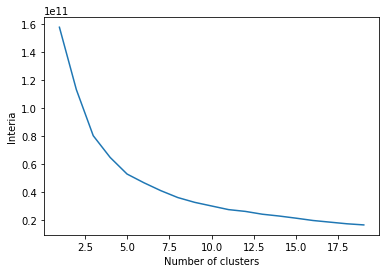

In [90]:
#Graph plotting of  number of cluster vs inertia
plt.plot(range(1, 20), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Interia') 
plt.show()

#to see which value of number of cluster will be the best value depends upon the 
#start of the steep curve the point  at which the steep curve start that will be the best value of 
#K  here in this case it will be 5.0 

In [104]:
# using the best K value to perform prediction

predictions=kmeans.fit_predict(df)
print(predictions)

[ 6  5  5  8  2  8  8  5  0 14  5  8  3  6  3  8  5  0  6  5  2  0  3 16
  3  6  8  8 14 10  6  0  2  3  0  5  3  6 14  1  2  2  6 14  6 14 14  4
  6  7  0  0 10  5  2  0  7  5  8  5  8  4  5  6  0 18  0  6  0  8  2  6
 13  2  5  2  0  7  8  0  0  5  6  2  8 15  9 10 13  2  8 13  7 13  5  0
  5  0  0  8  6 14  5  1  8  8  5  6  5 14  8  6  2  8  2  8  8  0  2  8
  2  0  8  6 10  1  2  6  0 10 13  0  8  8  0  0  5  5  8  0  2  3 10 13
  2  7  8  8  0 10  8  0  2  0  0 14  5  2  5  5  5  8  8 14  5  6  5  0
  0  0  5 14  5 14  0  5 10  8  8  0  6 12  5 11  0  8  0  5  5  5  2  8
  0 14  0  2  3  5  8  8 14 14  3  0  0 14  0  5  0 14  2  7  0  5  5  5
  7  2  5  0  8  5 13  0  0  8  2  0  0 13 13  5  2  0  8  0  8  2  0 10
  2  2  2  8  5  5  8  8  8 13  0  7 13  3  6 10  8  8  1  1  8 13  2  0
  5 14 14  2  6  8  0  0  5 10  0  0  3 13  8  6  0  8 10  2  1 10  0  2
  8 10  0  0  0  5  2  8  2  8  5  0  6 14  5  5 14  5 14  2  0 14 13  3
 14  8  8  5  0  0  8 14  0  8  8  6  2 17  0  0  2

In [105]:

frame = pd.DataFrame(df)
frame['cluster'] = predictions
frame['cluster'].value_counts()

0     98
8     75
5     67
2     56
14    33
6     31
13    20
3     18
10    17
7      9
1      6
4      2
18     2
16     1
15     1
9      1
12     1
11     1
17     1
Name: cluster, dtype: int64

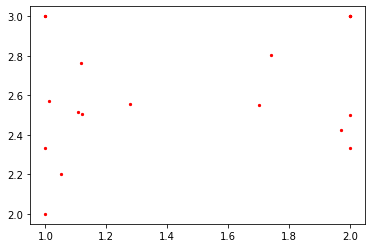

In [127]:


# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=5,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()